In [277]:
# !pip install mplfinance

In [278]:
import mplfinance as mpf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [279]:
df_ADBL = pd.read_csv("C:/Users/Dell/Desktop/NEPSE/nepsealpha_export_price_ADBL_2013-08-26_2023-08-26.csv")
df2 = pd.read_csv("C:/Users/Dell/Downloads/nepsealpha_export_price_ADBL_2023-08-24_2024-07-12.csv")

In [280]:
df_ADBL = pd.concat([df2, df_ADBL])
df_ADBL.head()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
0,ADBL,2024-07-11,288.1,291.8,286.0,291.0,1.57 %,"139,159.00"
1,ADBL,2024-07-10,283.0,288.0,282.0,286.5,0.46 %,"42,559.00"
2,ADBL,2024-07-09,286.1,287.5,278.0,285.2,1.68 %,"274,360.00"
3,ADBL,2024-07-08,282.0,286.4,279.4,280.5,-0.21 %,"49,865.00"
4,ADBL,2024-07-07,271.0,283.0,271.0,281.1,3.00 %,"106,759.00"


In [281]:
df_ADBL.head()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
0,ADBL,2024-07-11,288.1,291.8,286.0,291.0,1.57 %,"139,159.00"
1,ADBL,2024-07-10,283.0,288.0,282.0,286.5,0.46 %,"42,559.00"
2,ADBL,2024-07-09,286.1,287.5,278.0,285.2,1.68 %,"274,360.00"
3,ADBL,2024-07-08,282.0,286.4,279.4,280.5,-0.21 %,"49,865.00"
4,ADBL,2024-07-07,271.0,283.0,271.0,281.1,3.00 %,"106,759.00"


In [282]:
df_ADBL

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
0,ADBL,2024-07-11,288.1,291.8,286.0,291.0,1.57 %,"139,159.00"
1,ADBL,2024-07-10,283.0,288.0,282.0,286.5,0.46 %,"42,559.00"
2,ADBL,2024-07-09,286.1,287.5,278.0,285.2,1.68 %,"274,360.00"
3,ADBL,2024-07-08,282.0,286.4,279.4,280.5,-0.21 %,"49,865.00"
4,ADBL,2024-07-07,271.0,283.0,271.0,281.1,3.00 %,"106,759.00"
...,...,...,...,...,...,...,...,...
2273,ADBL,2013-09-02,273.0,273.0,269.0,273.0,0.00,4607
2274,ADBL,2013-09-01,270.0,278.0,266.0,273.0,1.11,10315
2275,ADBL,2013-08-29,269.0,275.0,261.0,270.0,0.37,10781
2276,ADBL,2013-08-27,265.0,273.0,266.0,269.0,1.51,5993


In [283]:
df_ADBL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2277
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          2477 non-null   object 
 1   Date            2477 non-null   object 
 2   Open            2477 non-null   float64
 3   High            2477 non-null   float64
 4   Low             2477 non-null   float64
 5   Close           2477 non-null   float64
 6   Percent Change  2477 non-null   object 
 7   Volume          2477 non-null   object 
dtypes: float64(4), object(4)
memory usage: 174.2+ KB


In [284]:
df_ADBL[(df_ADBL["Date"] > "2016-09-20") & (df_ADBL["Date"] < "2016-10-01")]

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
1580,ADBL,2016-09-29,660.0,670.0,660.0,670.0,-0.30,3261
1581,ADBL,2016-09-28,672.0,677.0,670.0,672.0,0.00,1414
1582,ADBL,2016-09-27,677.0,684.0,672.0,672.0,-0.44,4456
1583,ADBL,2016-09-26,697.0,690.0,659.0,675.0,-3.16,10691
1584,ADBL,2016-09-25,1032.0,1032.0,997.0,1019.0,-0.59,31362
1585,ADBL,2016-09-22,1032.0,1032.0,997.0,1019.0,-0.59,31362
1586,ADBL,2016-09-21,1037.0,1045.0,1020.0,1025.0,-1.82,24012


In [285]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

# df_ADBL = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

# plt.figure(figsize=(12, 10))
fig = go.Figure(data=[go.Candlestick(x=df_ADBL['Date'],
                open=df_ADBL['Open'],
                high=df_ADBL['High'],
                low=df_ADBL['Low'],
                close=df_ADBL['Close'])])
fig.update_layout(
    width=1300,  # Set the width
    height=700,  # Set the height
    title='Candlestick Chart of ADBL'
)
fig.show()

## 1. SVM

In [286]:
# Feature creation: Use previous closing prices as features (e.g., lagged prices)
df_ADBL['Lag_1'] = df_ADBL['Close'].shift(1)
df_ADBL['Lag_2'] = df_ADBL['Close'].shift(2)
df_ADBL.dropna(inplace=True)

# Features and target
X = df_ADBL[['Lag_1', 'Lag_2']]
y = df_ADBL['Close']

In [287]:
len(X), len(y)

(2475, 2475)

In [288]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [289]:
# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [290]:
# Train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled.ravel())


SVR(C=100, gamma=0.1)

In [291]:
# Predict and evaluate
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

In [306]:
list(zip(y_pred, y))[:10]

[(array([510.0097], dtype=float32), 285.2),
 (array([431.0968], dtype=float32), 280.5),
 (array([433.82172], dtype=float32), 281.1),
 (array([495.94894], dtype=float32), 272.9),
 (array([518.52594], dtype=float32), 271.0),
 (array([484.61304], dtype=float32), 272.0),
 (array([572.2197], dtype=float32), 267.5),
 (array([523.2392], dtype=float32), 259.0),
 (array([423.0436], dtype=float32), 261.0),
 (array([459.0232], dtype=float32), 263.0)]

Mean Squared Error (MSE): 96.8437220055558
Mean Absolute Error (MAE): 6.521112489146744
R-squared (R²): 0.9946338748220005


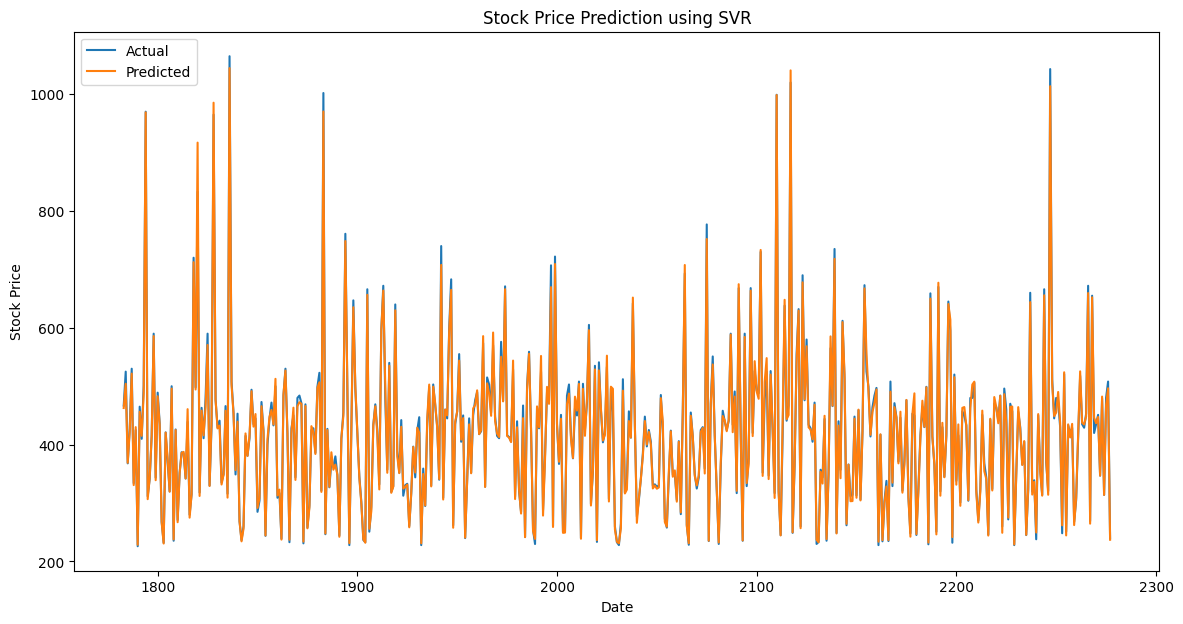

In [293]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df_ADBL.index[-len(y_test):], y_test, label='Actual')
plt.plot(df_ADBL.index[-len(y_test):], y_pred, label='Predicted')
plt.title('Stock Price Prediction using SVR')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## 2. CNN

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

In [295]:
# Ensure 'Date' is the index
# df_ADBL.set_index('Date', inplace=True)

In [296]:
# Feature creation: Use previous closing prices as features
window_size = 15
features = []
target = []

for i in range(len(df_ADBL) - window_size):
    features.append(df_ADBL['Close'].values[i:i + window_size])
    target.append(df_ADBL['Close'].values[i + window_size])

In [297]:
features = np.array(features)
target = np.array(target)

In [298]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [299]:
# Reshape data for CNN [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [300]:
# Scale the target
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

In [301]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



62/62 - 1s - 14ms/step - loss: 338.1102 - val_loss: 10.2782
Epoch 2/100
62/62 - 0s - 2ms/step - loss: 15.3407 - val_loss: 0.0830
Epoch 3/100
62/62 - 0s - 2ms/step - loss: 3.1438 - val_loss: 0.0808
Epoch 4/100
62/62 - 0s - 2ms/step - loss: 1.4311 - val_loss: 0.0794
Epoch 5/100
62/62 - 0s - 2ms/step - loss: 0.7388 - val_loss: 0.0589
Epoch 6/100
62/62 - 0s - 2ms/step - loss: 0.4791 - val_loss: 0.0180
Epoch 7/100
62/62 - 0s - 2ms/step - loss: 0.4068 - val_loss: 0.0189
Epoch 8/100
62/62 - 0s - 2ms/step - loss: 0.3365 - val_loss: 0.0187
Epoch 9/100
62/62 - 0s - 2ms/step - loss: 0.2962 - val_loss: 0.0092
Epoch 10/100
62/62 - 0s - 2ms/step - loss: 0.1744 - val_loss: 0.0067
Epoch 11/100
62/62 - 0s - 2ms/step - loss: 0.3763 - val_loss: 0.0111
Epoch 12/100
62/62 - 0s - 2ms/step - loss: 0.0791 - val_loss: 0.0090
Epoch 13/100
62/62 - 0s - 2ms/step - loss: 0.0933 - val_loss: 0.0067
Epoch 14/100
62/62 - 0s - 2ms/step - loss: 0.1410 - val_loss: 0.0130
Epoch 15/100
62/62 - 0s - 3ms/step - loss: 0.1170 

In [302]:
model.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3146e-04 


0.0008967931498773396

In [303]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [304]:

# Inverse transform y_test for comparison
y_test = scaler_y.inverse_transform(y_test)

Mean Squared Error (MSE): 661.1104452924523
Mean Absolute Error (MAE): 19.41180651905091
R-squared (R²): 0.9637439416136413


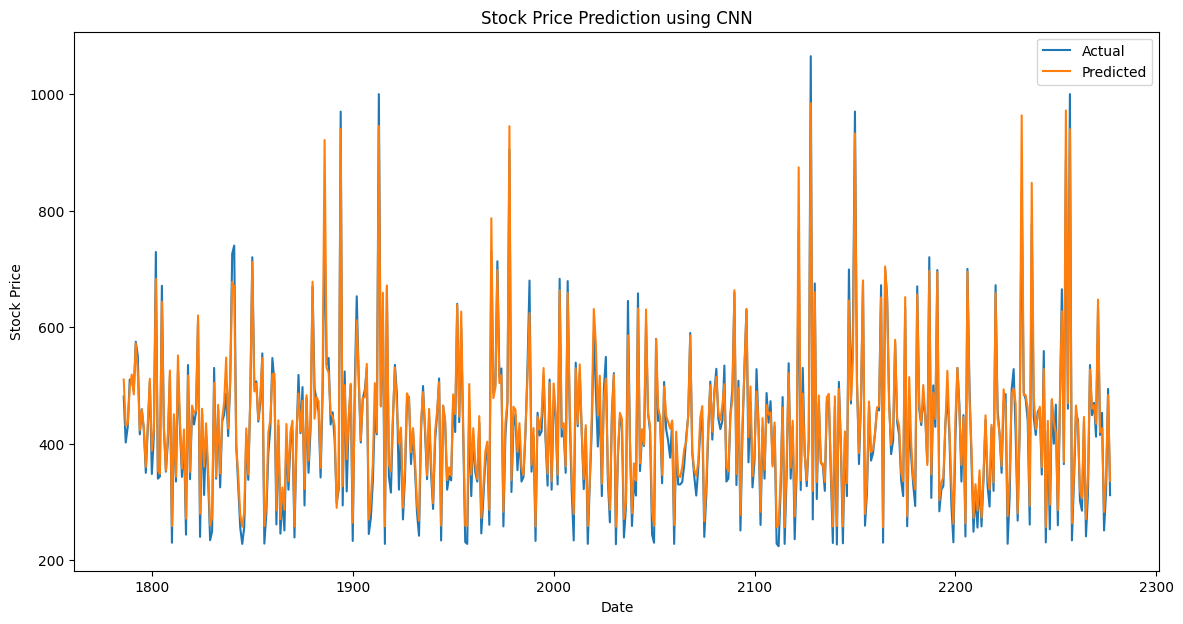

In [305]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df_ADBL.index[-len(y_test):], y_test, label='Actual')
plt.plot(df_ADBL.index[-len(y_test):], y_pred, label='Predicted')
plt.title('Stock Price Prediction using CNN')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()